In [4]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# 21/09/2022 this house prices data is cleaner than the old one

train = pd.read_csv('data/new_train.csv')
test = pd.read_csv('data/new_test.csv')

In [6]:
# lets see what features matter for sale Price
(train.corr()**2)["SalePrice"].sort_values(ascending = False)[:20] 

SalePrice       1.000000
OverallQual     0.641374
GrLivArea       0.519144
ExterQual       0.482508
KitchenQual     0.443845
GarageCars      0.421534
TotalBsmtSF     0.418072
GarageArea      0.405723
1stFlrSF        0.390918
BsmtQual        0.350551
FullBath        0.312535
GarageFinish    0.310036
TotRmsAbvGrd    0.288865
YearBuilt       0.286524
FireplaceQu     0.279673
YearRemodAdd    0.271887
GarageYrBlt     0.271058
MasVnrArea      0.224345
Fireplaces      0.217870
HeatingQC       0.189295
Name: SalePrice, dtype: float64

In [7]:
# lest plot our data using this function found in  # https://goldinlocks.github.io/linear_regression_intro/

def plotting_3_chart(df, feature):
    ## Importing seaborn, matplotlab and scipy modules. 
    import matplotlib.gridspec as gridspec
    from scipy import stats

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(8,5))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title(f'{feature} Histogram')
    ## plot the histogram. 
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1, bins=20, fit=stats.norm)
    ax1.legend(('normal', f'{feature}'))

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 );

    

c:\users\legion\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\legion\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\legion\appdata\local\programs\python\python39\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


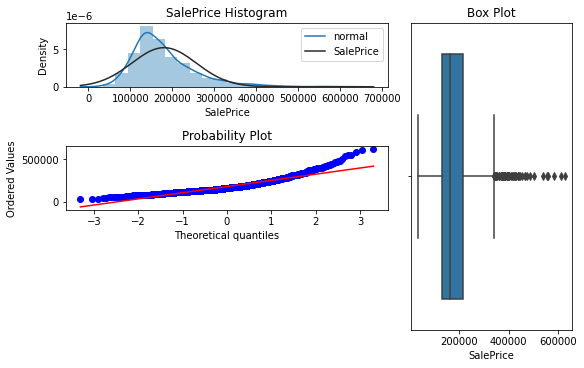

In [8]:
plotting_3_chart(train, 'SalePrice') 

In [9]:
# lets normalize data using Log 
train["SalePrice"] = np.log1p(train["SalePrice"])

c:\users\legion\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\legion\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\legion\appdata\local\programs\python\python39\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


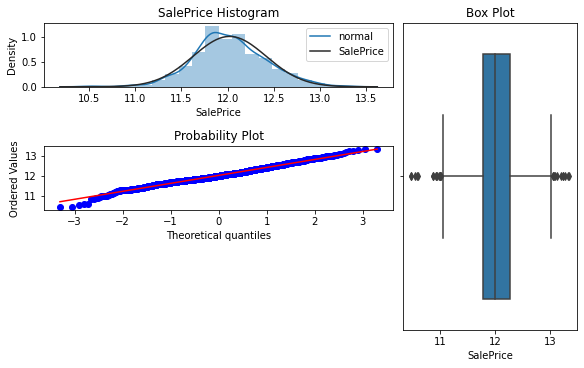

In [10]:
plotting_3_chart(train, 'SalePrice')

### Data Preparation  ###
 

In [11]:
# we combine our data 
all_data = pd.concat((train, test)).reset_index(drop = True)

In [12]:
all_data.shape

(2915, 98)

In [13]:
# drop our target "sales price " 
all_data.drop(['SalePrice'], axis = 1 , inplace= True)

In [14]:
all_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,...,Exterior_ImStucc,Exterior_CemntBd,Exterior_VinylSd,Exterior_Stone,Exterior_Wd Sdng,Exterior_AsbShng,Exterior_AsphShn,Exterior_CBlock,Exterior_HdBoard,Exterior_BrkComm
0,1,2-STORY 1946+,RL,65.0,8450,NaN,0,Lvl,Inside,0,...,0,0,1,0,0,0,0,0,0,0
1,2,1-STORY 1946+,RL,80.0,9600,NaN,0,Lvl,FR2,0,...,0,0,0,0,0,0,0,0,0,0
2,3,2-STORY 1946+,RL,68.0,11250,NaN,1,Lvl,Inside,0,...,0,0,1,0,0,0,0,0,0,0
3,4,2-STORY 1945-,RL,60.0,9550,NaN,1,Lvl,Corner,0,...,0,0,0,0,1,0,0,0,0,0
4,5,2-STORY 1946+,RL,84.0,14260,NaN,1,Lvl,FR2,0,...,0,0,1,0,0,0,0,0,0,0


Data cleaning 


In [15]:
# 1 - Lets fill empty features with NONE istead of letting them with NAs

NA_as_none = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'MasVnrType', 'MSZoning']

for i in NA_as_none : 
    all_data[i] = all_data[i].fillna('None')
all_data


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,...,Exterior_ImStucc,Exterior_CemntBd,Exterior_VinylSd,Exterior_Stone,Exterior_Wd Sdng,Exterior_AsbShng,Exterior_AsphShn,Exterior_CBlock,Exterior_HdBoard,Exterior_BrkComm
0,1,2-STORY 1946+,RL,65.0,8450,None,0,Lvl,Inside,0,...,0,0,1,0,0,0,0,0,0,0
1,2,1-STORY 1946+,RL,80.0,9600,None,0,Lvl,FR2,0,...,0,0,0,0,0,0,0,0,0,0
2,3,2-STORY 1946+,RL,68.0,11250,None,1,Lvl,Inside,0,...,0,0,1,0,0,0,0,0,0,0
3,4,2-STORY 1945-,RL,60.0,9550,None,1,Lvl,Corner,0,...,0,0,0,0,1,0,0,0,0,0
4,5,2-STORY 1946+,RL,84.0,14260,None,1,Lvl,FR2,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2910,2915,2-STORY PUD 1946+,RM,21.0,1936,None,0,Lvl,Inside,0,...,0,1,0,0,0,0,0,0,0,0
2911,2916,2-STORY PUD 1946+,RM,21.0,1894,None,0,Lvl,Inside,0,...,0,1,0,0,0,0,0,0,0,0
2912,2917,1-STORY 1946+,RL,160.0,20000,None,0,Lvl,Inside,0,...,0,0,1,0,0,0,0,0,0,0
2913,2918,SPLIT FOYER,RL,62.0,10441,None,0,Lvl,Inside,0,...,0,0,0,0,0,0,0,0,1,0


<AxesSubplot:>

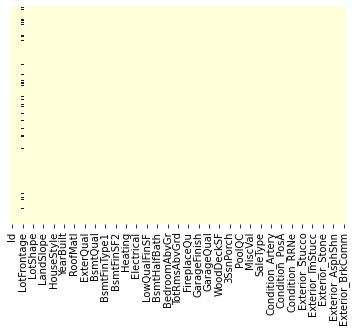

In [16]:
# see the NA is our data 
sns.heatmap(all_data.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [17]:
# 2  - convert features with numbers to Str 
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
all_data['OverallQual'] = all_data['OverallQual'].astype(str)
all_data['MSSubClass'] = all_data['MSSubClass'].astype(str) 
all_data['YearBuilt'] = all_data['YearBuilt'].astype(str) 
all_data['YearRemodAdd'] = all_data['YearRemodAdd'].astype(str)
all_data['GarageYrBlt'] = all_data['GarageYrBlt'].astype(str) 
all_data['YrSold'] = all_data['YrSold'].astype(str) 
all_data['MoSold'] = all_data['MoSold'].astype(str)


In [18]:
# still have some missing values 

all_data['Functional'] = all_data['Functional'].fillna('Typical') 
all_data['LotFrontage'] = all_data['LotFrontage'].fillna(0)
all_data['MasVnrArea'] = all_data['MasVnrArea'].fillna(0) 
all_data['BsmtFullBath'] = all_data['BsmtFullBath'].fillna(0) 
all_data['BsmtHalfBath'] = all_data['BsmtHalfBath'].fillna(0)
all_data['BsmtFinSF1'] = all_data['BsmtFinSF2'].fillna(0) 
all_data['BsmtFinSF2'] = all_data['BsmtFinSF2'].fillna(0) 
all_data['BsmtUnfSF'] = all_data['BsmtUnfSF'].fillna(0) 
all_data['TotalBsmtSF'] = all_data['TotalBsmtSF'].fillna(0) 
all_data['SaleType'] = all_data['SaleType'].fillna("Oth") 
all_data['GarageCars'] = all_data['GarageCars'].fillna(0) 
all_data['GarageYrBlt'] = all_data['GarageYrBlt'].fillna(0)
all_data['Electrical'] = all_data['Electrical'].fillna('SBrkr')
all_data['GarageArea'] = all_data['GarageArea'].fillna(0) 



<AxesSubplot:>

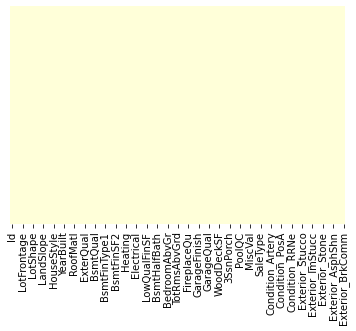

In [19]:
# missing values ? well , None 
sns.heatmap(all_data.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

### Feature engineering

In [20]:
all_data['TotalSQFT'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF'] #basement + floor 1 + floor 2
all_data['Yearbuilt/remodelled'] = (all_data['YearBuilt'] + all_data['YearRemodAdd'])
all_data['BSMT'] = all_data['1stFlrSF'] + all_data['2ndFlrSF']

all_data['TotalBathrooms'] = (all_data['FullBath'] + (all_data['HalfBath']) + all_data['BsmtFullBath'] + (all_data['BsmtHalfBath'])) # bathrooms

In [21]:
all_data['haspool'] = all_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0) 
all_data['has2ndfloor'] = all_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0) 
all_data['hasgarage'] = all_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0) 
all_data['hasbsmt'] = all_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0) 
all_data['hasfireplace'] = all_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [22]:
# We cannot use categorical  values in linear regression 
# so lets use pandas to create dummies 
final_features = pd.get_dummies(all_data).reset_index(drop=True) 
final_features


,Id,LotFrontage,LotArea,LotShape,LandSlope,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,...,Yearbuilt/remodelled_20052007,Yearbuilt/remodelled_20062006,Yearbuilt/remodelled_20062007,Yearbuilt/remodelled_20072007,Yearbuilt/remodelled_20072008,Yearbuilt/remodelled_20082008,Yearbuilt/remodelled_20082009,Yearbuilt/remodelled_20092009,Yearbuilt/remodelled_20092010,Yearbuilt/remodelled_20102010
0,1,65.0,8450,0,0,196.0,4,3,4,3,...,0,0,0,0,0,0,0,0,0,0
1,2,80.0,9600,0,0,0.0,3,3,4,3,...,0,0,0,0,0,0,0,0,0,0
2,3,68.0,11250,1,0,162.0,4,3,4,3,...,0,0,0,0,0,0,0,0,0,0
3,4,60.0,9550,1,0,0.0,3,3,3,4,...,0,0,0,0,0,0,0,0,0,0
4,5,84.0,14260,1,0,350.0,4,3,4,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2910,2915,21.0,1936,0,0,0.0,3,3,3,3,...,0,0,0,0,0,0,0,0,0,0
2911,2916,21.0,1894,0,0,0.0,3,3,3,3,...,0,0,0,0,0,0,0,0,0,0
2912,2917,160.0,20000,0,0,0.0,3,3,3,3,...,0,0,0,0,0,0,0,0,0,0
2913,2918,62.0,10441,0,0,0.0,3,3,4,3,...,0,0,0,0,0,0,0,0,0,0


In [23]:
#Split our Data 

#from sklearn.model_selection import train_test_split

#x_train , x_test = train_test_split( final_features , test_size= 0.5)                       

In [24]:
x_train = final_features[:1460]

x_test = final_features[1460:]
y = pd.DataFrame(data =train["SalePrice"]) 


In [25]:
# lets see witch features contribute the most in target ( salesprice ) $ using  PCA

In [31]:
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
sc = StandardScaler() #this is a requirement for pca .. otherwise it breaks 
x_train = sc.fit_transform(x_train)

In [32]:
pca_com = 250 
pca = PCA(n_components=978)
x_train = pca.fit_transform(x_train)

In [33]:
explained_variance = pca.explained_variance_ratio_ 
#X_train #explained varience is pretty self explanotory

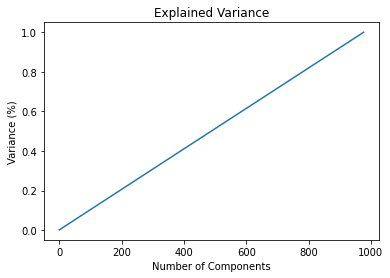

In [34]:
plt.figure() 
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('Number of Components') 
plt.ylabel('Variance (%)') 
plt.title('Explained Variance') 
plt.show()

PCA results : 
250 components make 80% of the variance ( PARETO)



In [35]:
# we gonna create a new data where the columns with the highesst variance ( 250 first coulumns ) and drop the others 
Var_matrix =(pd.concat([pd.DataFrame(list(final_features.columns), columns=["Factors"] ) 
               ,pd.DataFrame(list(explained_variance**2), columns=["^2 Variance"] )] 
              , axis=1).sort_values(by='^2 Variance', ascending = False)[0:pca_com])

list(Var_matrix['Factors']) 
X_new = final_features[list(Var_matrix['Factors'])]

X_new.dtypes 

#we take the columns below 

Id                  int64
LotFrontage       float64
LotArea             int64
LotShape            int64
LandSlope           int64
                   ...   
YearBuilt_1967      uint8
YearBuilt_1968      uint8
YearBuilt_1969      uint8
YearBuilt_1970      uint8
YearBuilt_1971      uint8
Length: 250, dtype: object

In [57]:
X_new.isnull().sum().sort_values(ascending=False)/X_new.shape[0]

Id                                0.0
YearBuilt_1872                    0.0
OverallQual_6                     0.0
OverallQual_7                     0.0
OverallQual_8                     0.0
                                 ... 
MSSubClass_2 FAMILY CONVERSION    0.0
MSSubClass_2-1/2 STORY            0.0
MSSubClass_2-STORY 1945-          0.0
MSSubClass_2-STORY 1946+          0.0
YearBuilt_1971                    0.0
Length: 250, dtype: float64

In [58]:
# our new data 
X_new.head()


,Id,LotFrontage,LotArea,LotShape,LandSlope,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,...,YearBuilt_1962,YearBuilt_1963,YearBuilt_1964,YearBuilt_1965,YearBuilt_1966,YearBuilt_1967,YearBuilt_1968,YearBuilt_1969,YearBuilt_1970,YearBuilt_1971
0,1,65.0,8450,0,0,196.0,4,3,4,3,...,0,0,0,0,0,0,0,0,0,0
1,2,80.0,9600,0,0,0.0,3,3,4,3,...,0,0,0,0,0,0,0,0,0,0
2,3,68.0,11250,1,0,162.0,4,3,4,3,...,0,0,0,0,0,0,0,0,0,0
3,4,60.0,9550,1,0,0.0,3,3,3,4,...,0,0,0,0,0,0,0,0,0,0
4,5,84.0,14260,1,0,350.0,4,3,4,3,...,0,0,0,0,0,0,0,0,0,0


In [37]:
y.shape

(1456, 1)

In [38]:
x_train = X_new[:1456] 
#respliting data 
x_test = X_new[1456:]

In [39]:
x_train.shape

(1456, 250)

## Linear regression model 


In [41]:
from sklearn.model_selection import train_test_split 
X_train_T, X_test_T, y_train_T, y_test_T = train_test_split(x_train, y, test_size=0.4)
X_train_T.shape, y_train_T.shape 
X_test_T.shape, y_test_T.shape

((583, 250), (583, 1))

In [42]:
# linear reg 
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

Text(0, 0.5, 'Predictions')

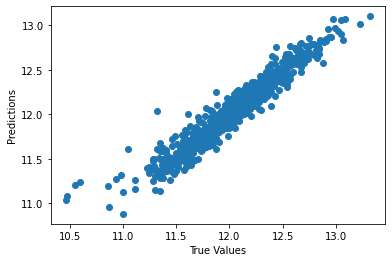

In [43]:
model = linear_model.Ridge(alpha=20)

model = model.fit(X_train_T, y_train_T)

predictions_T = model.predict(X_train_T)

y_hat_test = model.predict(X_test_T)

plt.scatter(y_train_T, predictions_T) 
plt.xlabel('True Values') 
plt.ylabel('Predictions')



Text(0, 0.5, 'Predictions')

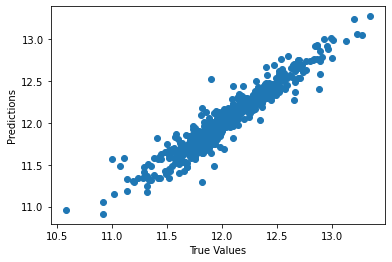

In [44]:
plt.scatter(y_test_T, y_hat_test) 
plt.xlabel('True Values') 
plt.ylabel('Predictions')

### Lets Evaluate our model  
Mean Squared Error is used to score our model in Kaggle competition 

In [45]:
import sklearn.metrics as metrics

In [46]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_T, y_hat_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_T, y_hat_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_T, y_hat_test))) 
print('Root Mean Squared Logarithmic Error:', np.sqrt(metrics.mean_squared_error(y_test_T, y_hat_test)))

Mean Absolute Error: 0.0842384369682698
Mean Squared Error: 0.013837642024898159
Root Mean Squared Error: 0.11763350723708853
Root Mean Squared Logarithmic Error: 0.11763350723708853


In [50]:
# predict the train values 
y_pred = model.predict(x_test)
y_pred

# this values are nomlized with log as we did in our data prep 
Regresult = np.expm1(y_pred)


In [51]:
y_pred,y 
Pred = pd.DataFrame(y_pred, columns=['SalePrice']) 
df1 = pd.concat([y, Pred], axis=1)

In [52]:
#creating a data frame for the export file with saleprice and id
Regresult = pd.DataFrame(Regresult, columns=['SalePrice']) 
test["Id"].shape, Regresult.shape 
test_t = pd.DataFrame(test["Id"])

In [53]:
my_submission = pd.concat([test_t, Regresult ], axis=1)

In [54]:
my_submission.to_csv('RESULTS_Aym0ane.csv', index=False)
my_submission

# submitted in Kaggle 

,Id,SalePrice
0,1461,116281.476174
1,1462,126685.369039
2,1463,183451.112128
3,1464,195867.259407
4,1465,189345.618050
...,...,...
1454,2915,86546.825052
1455,2916,95752.314749
1456,2917,181933.557745
1457,2918,106664.549324


####  done 
by : MAANE Aymane 